# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the `whale_analysis.ipynb` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [38]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [39]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
whale_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)    

# Review the first 5 rows of the DataFrame
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [58]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
whale_daily_returns_df = whale_df.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
whale_daily_returns_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Return Data'}, xlabel='date'>

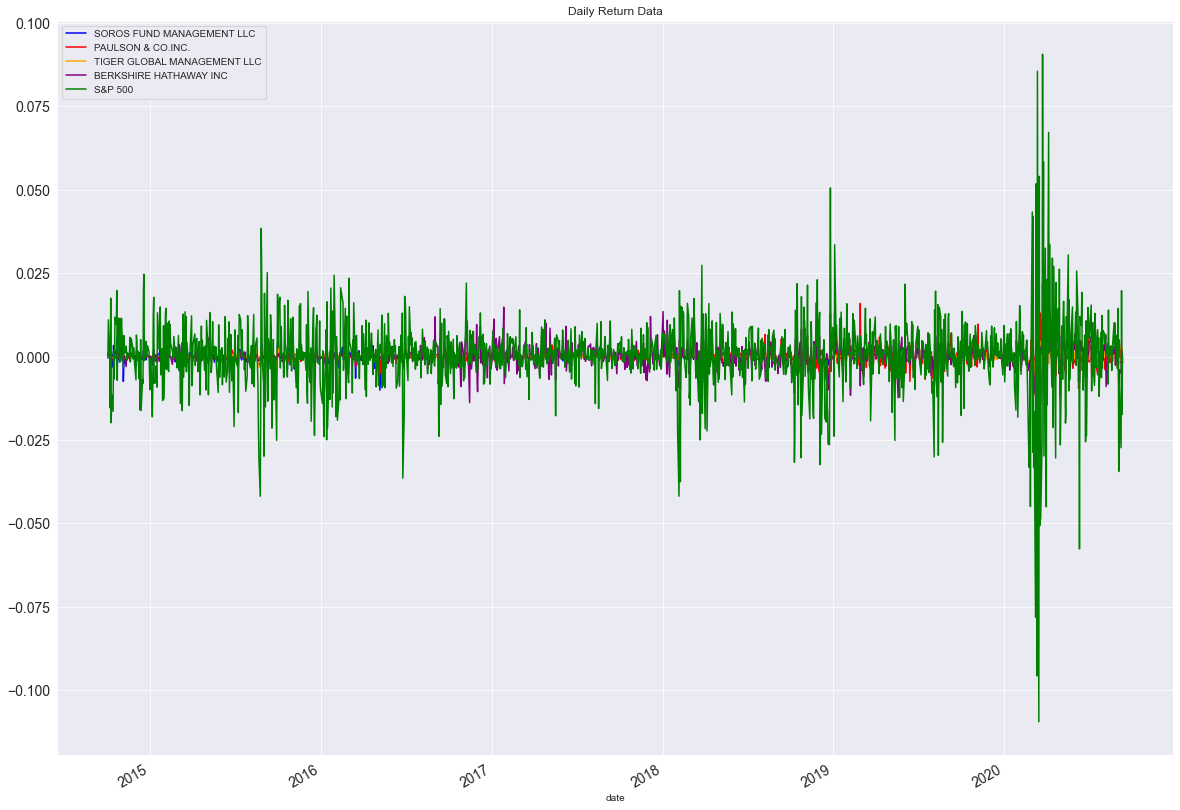

In [60]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
sns.set_style("dark")
sns.cubehelix_palette(as_cmap=True)

p = whale_daily_returns_df["SOROS FUND MANAGEMENT LLC"].plot(figsize = (20, 15), grid = True,
                                              title = "Daily Return Data", label = "SOROS FUND MANAGEMENT LLC",
                                               legend = True, color = "blue", fontsize = 14)

# PAULSON & CO.INC.
whale_daily_returns_df["PAULSON & CO.INC."].plot(figsize = (20, 15), grid = True,
                                  label = "PAULSON & CO.INC.", legend = True, color = "red",
                                  ax = p)

# TIGER GLOBAL MANAGEMENT LLC.
whale_daily_returns_df["TIGER GLOBAL MANAGEMENT LLC"].plot(figsize = (20, 15), grid = True,
                                            label = "TIGER GLOBAL MANAGEMENT LLC", legend = True,
                                            color = "orange", ax = p)

# BERKSHIRE HATHAWAY INC.
whale_daily_returns_df["BERKSHIRE HATHAWAY INC"].plot(figsize = (20, 15), grid = True,
                                       label = "BERKSHIRE HATHAWAY INC", legend = True,
                                       color = "purple", ax = p)

# S&P 500.
whale_daily_returns_df["S&P 500"].plot(figsize = (20, 15), grid = True,
                        label = "S&P 500", legend = True, color = "green", ax = p)

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [62]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
whale_cumulative_returns_df = (1 + whale_daily_returns_df).cumprod()

# Review the last 5 rows of the cumulative returns DataFrame
whale_cumulative_returns_df.tail(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Return Data'}, xlabel='date'>

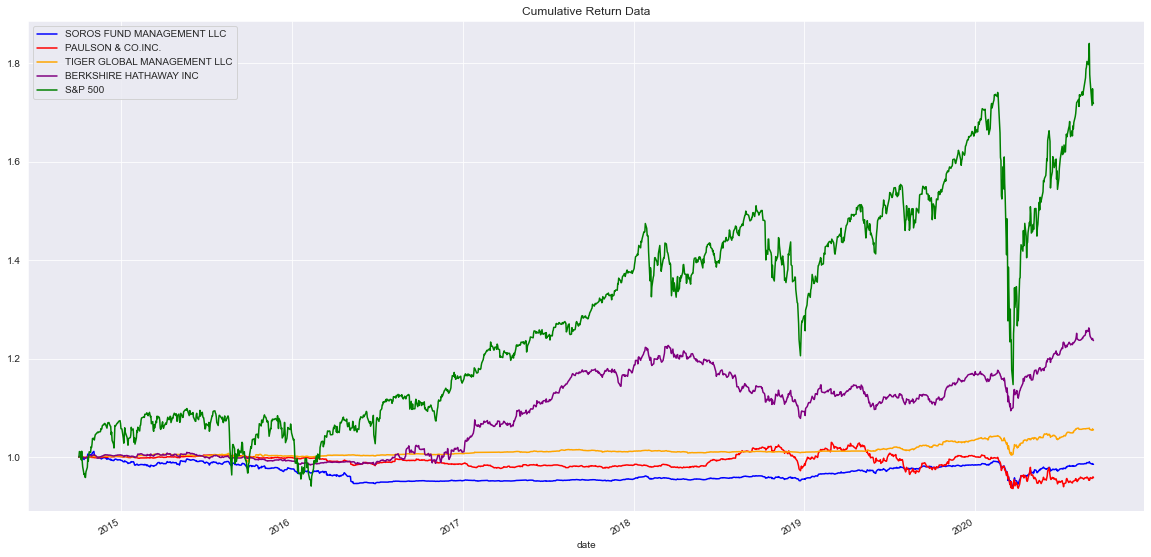

In [63]:
# Visualize the cumulative returns using the Pandas plot function

# SOROS FUND MANAGEMENT LLC
p = whale_cumulative_returns_df["SOROS FUND MANAGEMENT LLC"].plot(figsize = (20, 10), grid = True,
                                              title = "Cumulative Return Data", label = "SOROS FUND MANAGEMENT LLC",
                                               legend = True, color = "blue")

# PAULSON & CO.INC.
whale_cumulative_returns_df["PAULSON & CO.INC."].plot(figsize = (20, 10), grid = True,
                                  label = "PAULSON & CO.INC.", legend = True, color = "red",
                                  ax = p)

# TIGER GLOBAL MANAGEMENT LLC.
whale_cumulative_returns_df["TIGER GLOBAL MANAGEMENT LLC"].plot(figsize = (20, 10), grid = True,
                                            label = "TIGER GLOBAL MANAGEMENT LLC", legend = True,
                                            color = "orange", ax = p)

# BERKSHIRE HATHAWAY INC.
whale_cumulative_returns_df["BERKSHIRE HATHAWAY INC"].plot(figsize = (20, 10), grid = True,
                                       label = "BERKSHIRE HATHAWAY INC", legend = True,
                                       color = "purple", ax = p)

# S&P 500.
whale_cumulative_returns_df["S&P 500"].plot(figsize = (20, 10), grid = True,
                        label = "S&P 500", legend = True, color = "green", ax = p)

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

In [44]:
whale_cumulative_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,0.967653,0.990270,1.012684,1.090986,1.289820
std,0.015193,0.016013,0.012524,0.080554,0.210927
min,0.938412,0.936041,0.989953,0.983765,0.940880
25%,0.953162,0.981475,1.004210,1.002700,1.081451
50%,0.963863,0.992685,1.010291,1.112004,1.273116
75%,0.981216,0.999995,1.013149,1.162099,1.457628
max,1.011446,1.029809,1.058911,1.262370,1.840494


QUESTION 1: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

ANSWER 1: No. The data and visualization shows that overall, the S&P 500 index outperforms all the portfolios for the most part.  

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolio Volatility Analysis'}, ylabel='Daily Returns'>

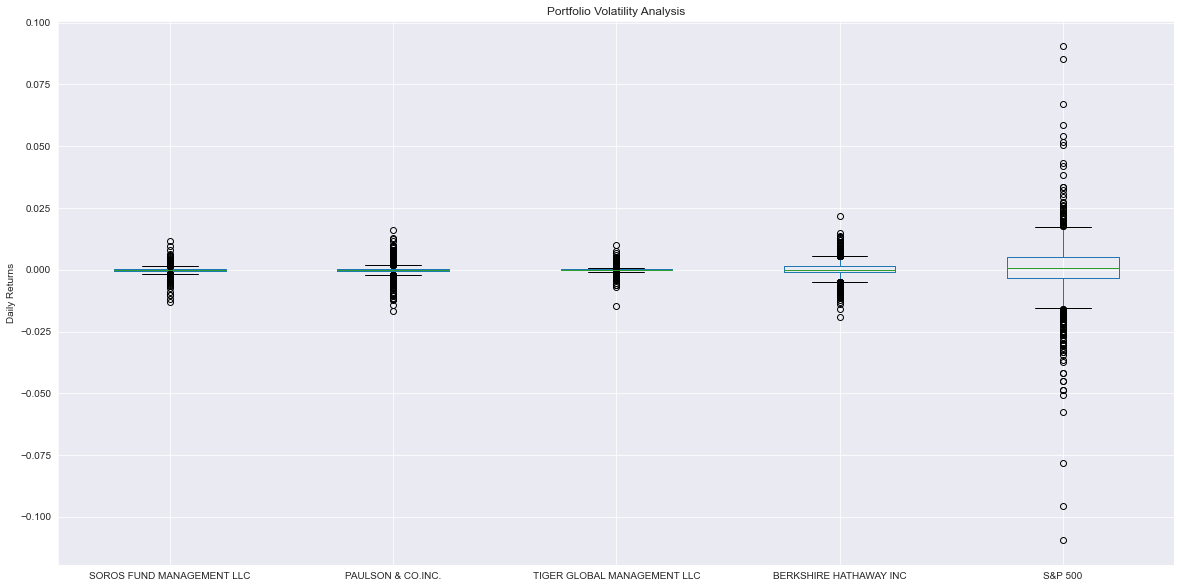

In [64]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
whale_daily_returns_df.plot(figsize = (20, 10), grid = True, kind = "box", 
                           title = "Portfolio Volatility Analysis", ylabel = "Daily Returns")

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolio Volatility Analysis for the Four Funds'}, ylabel='Daily Returns'>

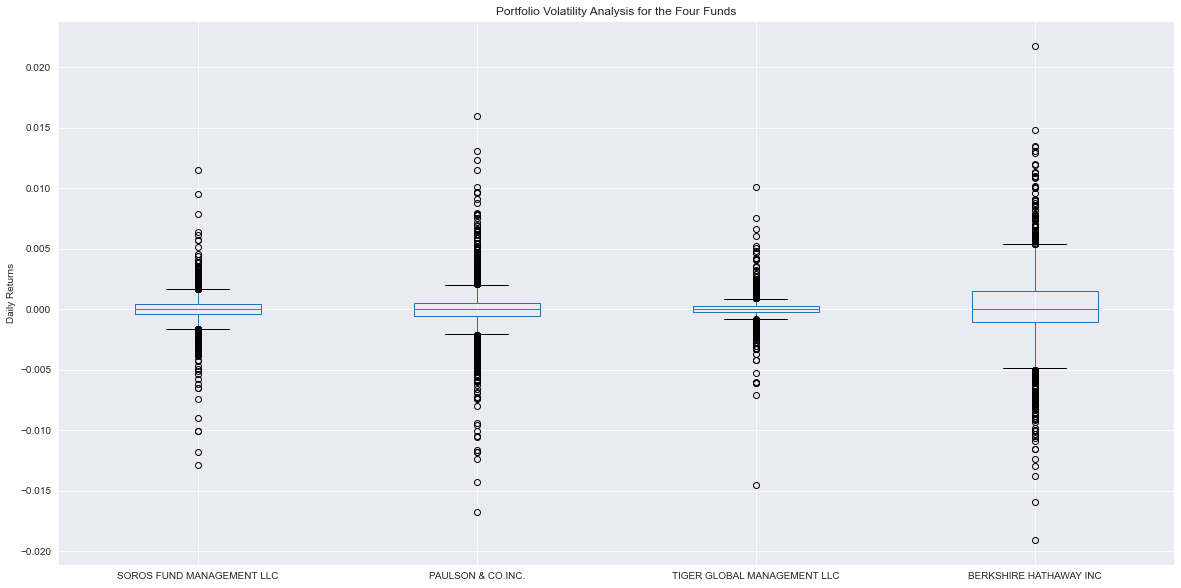

In [66]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
four_fund_portfolios_df = whale_daily_returns.drop(columns = "S&P 500")
four_fund_portfolios_df.plot(figsize = (20, 10), grid = True, kind = "box", 
                           title = "Portfolio Volatility Analysis for the Four Funds", ylabel = "Daily Returns")

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

QUESTION 1: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

ANSWER 1: Berkshire Hathaway was the most volatile and the least volatile was Tiger Global Management.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [67]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
whale_standard_deviation = whale_daily_returns.std().sort_values()
# Review the standard deviations sorted smallest to largest
whale_standard_deviation


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [68]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
trading_days = 252

# Multiply value by the number of trading days in a year, using the trading_days variable set above 
annual_std_whale_returns = whale_daily_returns.std() * np.sqrt(trading_days)

# Sort the annual average returns for the cryptocurrencies from lowest to highest
annual_std_whale_returns.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation of Daily Returns'}, xlabel='date', ylabel='Return'>

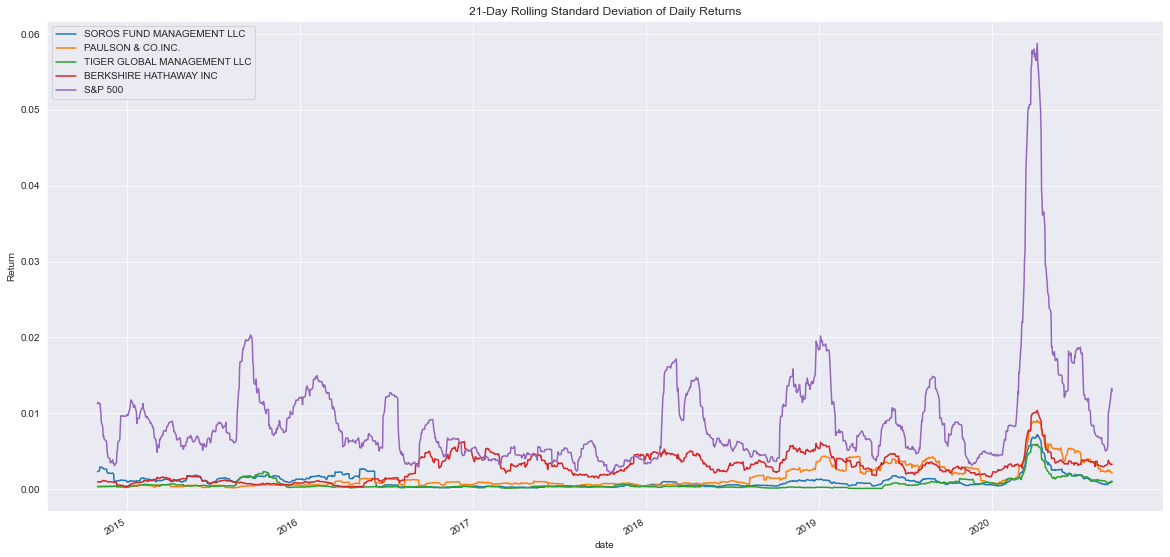

In [69]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
whale_daily_returns.rolling(window = 21).std().plot(figsize = (20, 10), grid = True,
                                                      title = "21-Day Rolling Standard Deviation of Daily Returns",
                                                      ylabel = "Return")

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-Day Rolling Mean of Daily Returns'}, xlabel='date', ylabel='Return'>

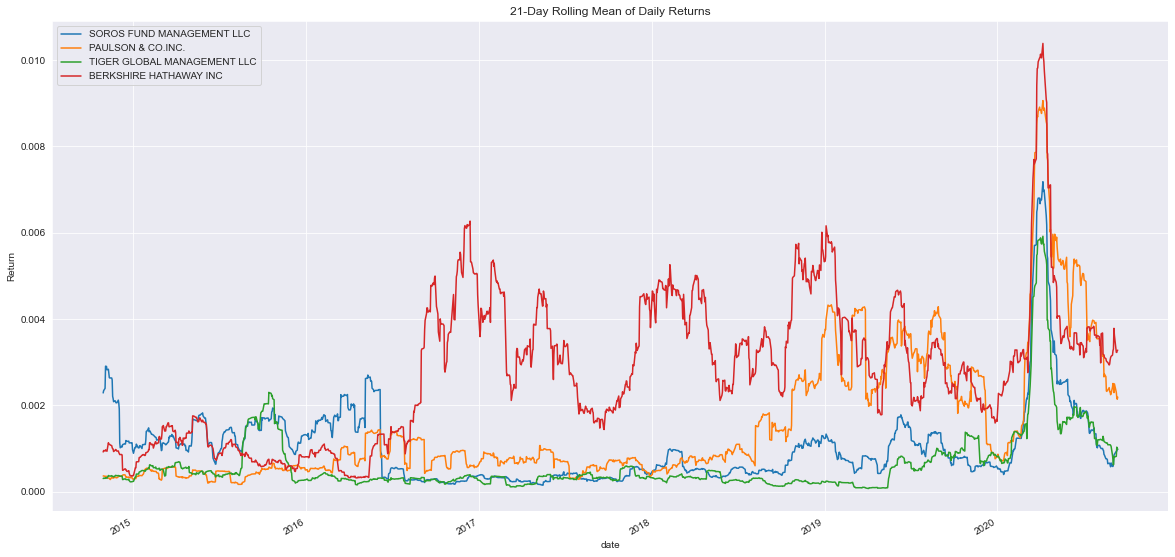

In [71]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
four_fund_portfolios_df.rolling(window = 21).std().plot(figsize = (20, 10), grid = True,
                                                         title = "21-Day Rolling Mean of Daily Returns",
                                                               ylabel = "Return")

QUESTION 1: Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

ANSWER 1: None of the portfolios pose more risk thna the S&P 500.

QUESTION 2: Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

ANSWER 2: No, between 2017 - 2019 seem to have a correlating risk, but beyond 2019 SP500 increases each year with more risk compared to all four of the funds.

QUESTION 3: Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

ANSWER 3:  Berkshire looks to be the riskiest of the four funds.  Between 2017 - 2018 it was the riskiest fund.  Starting in 2019 both Berkishire and Paulson both had correlating riskiness to them.  But by 2020 post covid all seem to have similar risk profiles.  Berkshire still leads in every 10 year segment for the riskiest Fund Portfolio.  

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [72]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
trading_days = 252
annual_average_whale_returns = whale_daily_returns.mean() * trading_days

# Review the annual average returns sorted from lowest to highest
annual_average_whale_returns.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [73]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
whale_sharpe_ratios = annual_average_whale_returns / annual_std_whale_returns
whale_sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Whale Porfolio Sharpe Ratios'}, ylabel='Ratio'>

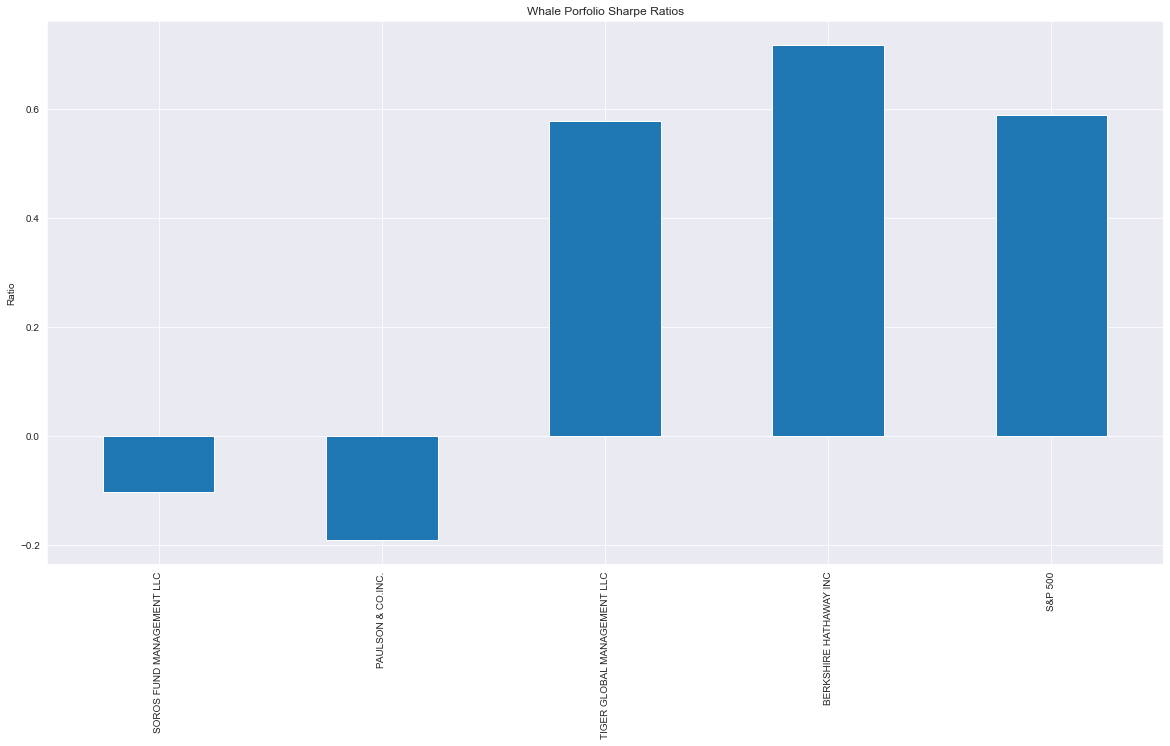

In [76]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
whale_sharpe_ratios.plot(figsize = (20, 10), grid = True, title = "Whale Porfolio Sharpe Ratios",
                        ylabel = "Ratio", kind = "bar")

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

QUESTION 1: Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
ANSWER 1: Berkshire Hathaway offers the best risk-return profile. Paulson & Co. offers the worst risk-return profile of the four portfolios.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [77]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_var_60 = whale_daily_returns["S&P 500"].rolling(window = 60).var().dropna()
sp500_var_60.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [80]:
# Calculate the covariance using a 60-day rolling window 
berkshire_cov_60 = four_fund_portfolios_df["BERKSHIRE HATHAWAY INC"].rolling(window = 60).cov(
    whale_daily_returns_df["S&P 500"]).dropna()

# Verification.
berkshire_cov_60.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [81]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
berkshire_beta_60 = berkshire_cov_60 / sp500_var_60

# Verification.
berkshire_beta_60.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [82]:
# Calculate the average of the 60-day rolling beta
print(f"Berkshire Hathaway Inc. 60-day rolling Beta mean: {berkshire_beta_60.mean(): .2f}")

Berkshire Hathaway Inc. 60-day rolling Beta mean:  0.22


##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Berkshire Hathaway Inc. 60-Day Rolling Beta'}, xlabel='date'>

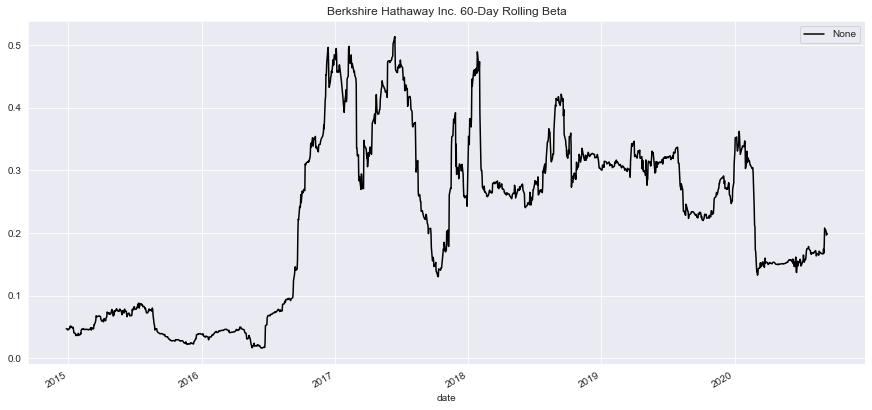

In [84]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
berkshire_beta_60.plot(figsize = (15, 7), title = "Berkshire Hathaway Inc. 60-Day Rolling Beta",
                      legend = True, grid = True, color = "black")

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [87]:
# Calculate the covariance using a 60-day rolling window 
tiger_cov_60 = four_fund_portfolios_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window = 60).cov(
    whale_daily_returns["S&P 500"]).dropna()

# Verification.
tiger_cov_60.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [88]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
tiger_beta_60 = tiger_cov_60 / sp500_var_60

# Verification.
tiger_beta_60.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [89]:
# Calculate the average of the 60-day rolling beta
print(f"Tiger Global Management LLC. 60-day rolling Beta mean: {tiger_beta_60.mean(): .2f}")

Tiger Global Management LLC. 60-day rolling Beta mean:  0.03


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Tiger Global Management LLC. 60-Day Rolling Beta'}, xlabel='date'>

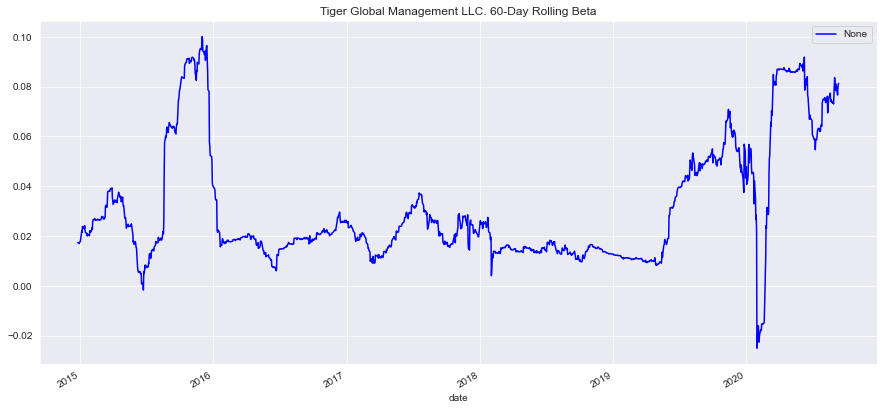

In [90]:
# Plot the rolling beta
# Include a title parameter and adjust the figure size
tiger_beta_60.plot(figsize = (15, 7), title = "Tiger Global Management LLC. 60-Day Rolling Beta",
                      legend = True, grid = True, color = "blue")

QUESTION 1: Which of the two portfolios seem more sensitive to movements in the S&P 500?

ANSWER 1: Berkshire Hathaway looks to be more sensitive to movements in relation to the S&P 500 since its value is greater than that of Tiger Global Management.

QUESTION 2: Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

ANSWER 2: In my opinion, Berkshire Hathaway should be included in the firm’s suite of fund offerings with the understanding that of the four funds it's the RISKIEST investment.